In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier

from collections import Counter
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import NearMiss

from sklearn.metrics import accuracy_score

In [95]:
# DataSet: https://www.kaggle.com/datasets/rjmanoj/credit-card-customer-churn-prediction
data = pd.read_csv("D:/DataSets/Predictive Analysis_ML/Churn_Modelling.csv")

# Data Understanding


In [96]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [97]:
data.shape

(10000, 14)

In [98]:
data.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6303,6304,15591169,Hawes,788,Germany,Female,49,4,137455.99,1,1,0,184178.29,1
6376,6377,15640686,Greco,700,France,Male,46,5,95872.86,1,1,0,98273.01,1
4650,4651,15664214,Hearn,670,France,Male,33,2,141204.65,2,1,0,76257.46,0
7600,7601,15762392,Ilyina,683,Spain,Male,30,1,113257.20,1,1,1,65035.02,0
1472,1473,15729956,Akabueze,726,Spain,Female,26,1,80780.16,1,1,1,19225.85,0


In [99]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 10000 entries, 0 to 9999

Data columns (total 14 columns):

 #   Column           Non-Null Count  Dtype  

---  ------           --------------  -----  

 0   RowNumber        10000 non-null  int64  

 1   CustomerId       10000 non-null  int64  

 2   Surname          10000 non-null  object 

 3   CreditScore      10000 non-null  int64  

 4   Geography        10000 non-null  object 

 5   Gender           10000 non-null  object 

 6   Age              10000 non-null  int64  

 7   Tenure           10000 non-null  int64  

 8   Balance          10000 non-null  float64

 9   NumOfProducts    10000 non-null  int64  

 10  HasCrCard        10000 non-null  int64  

 11  IsActiveMember   10000 non-null  int64  

 12  EstimatedSalary  10000 non-null  float64

 13  Exited           10000 non-null  int64  

dtypes: float64(2), int64(9), object(3)

memory usage: 1.1+ MB


In [101]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [102]:
data.duplicated().sum()

0

# Data Cleaning

In [103]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [104]:
data.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

In [105]:
data["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [106]:
data["Tenure"].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0], dtype=int64)

In [107]:
data["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [108]:
data["NumOfProducts"].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [109]:
data["HasCrCard"].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [110]:
data["IsActiveMember"].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [111]:
data["Exited"].unique()

array([1, 0], dtype=int64)

In [112]:
data["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

# Exploratory Data Analysis

In [113]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 10000 entries, 0 to 9999

Data columns (total 11 columns):

 #   Column           Non-Null Count  Dtype  

---  ------           --------------  -----  

 0   CreditScore      10000 non-null  int64  

 1   Geography        10000 non-null  object 

 2   Gender           10000 non-null  object 

 3   Age              10000 non-null  int64  

 4   Tenure           10000 non-null  int64  

 5   Balance          10000 non-null  float64

 6   NumOfProducts    10000 non-null  int64  

 7   HasCrCard        10000 non-null  int64  

 8   IsActiveMember   10000 non-null  int64  

 9   EstimatedSalary  10000 non-null  float64

 10  Exited           10000 non-null  int64  

dtypes: float64(2), int64(7), object(2)

memory usage: 859.5+ KB


Univariant Analysis

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


<AxesSubplot:xlabel='Geography', ylabel='count'>

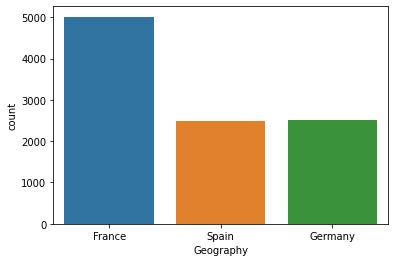

In [115]:
# Bar Plot
sns.countplot(data["Geography"])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

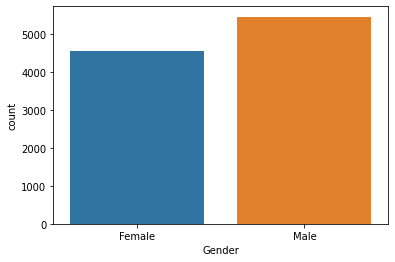

In [116]:
# Bar Plot
sns.countplot(data["Gender"])

<AxesSubplot:ylabel='Geography'>

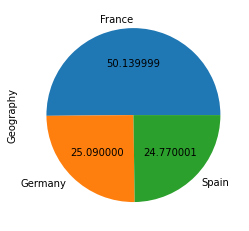

In [117]:
# Pie Chart

data["Geography"].value_counts().plot(kind="pie", autopct="%2f")

<AxesSubplot:ylabel='Gender'>

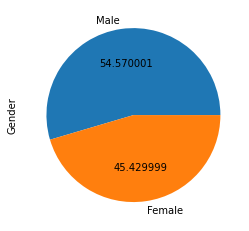

In [118]:
# Pie Chart

data["Gender"].value_counts().plot(kind="pie", autopct="%2f")

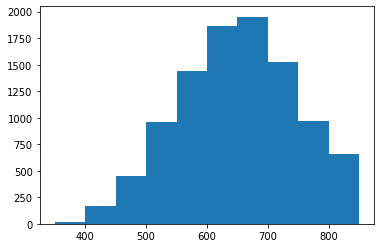

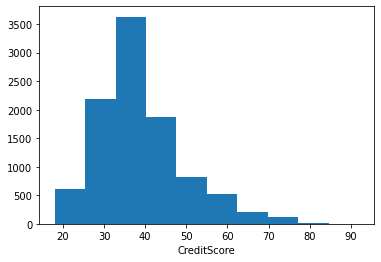

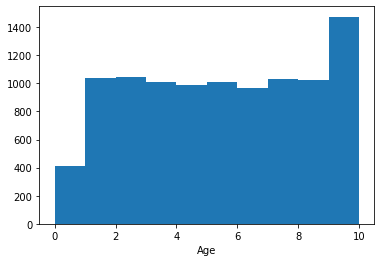

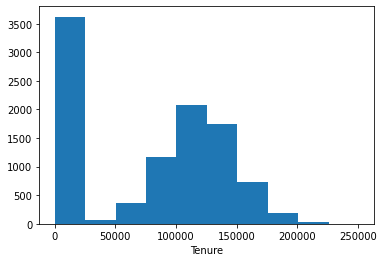

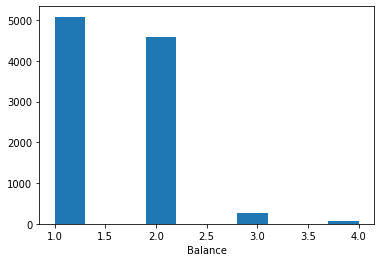

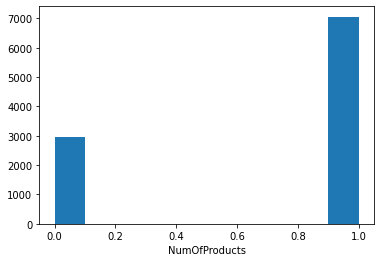

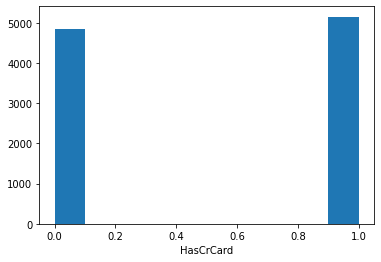

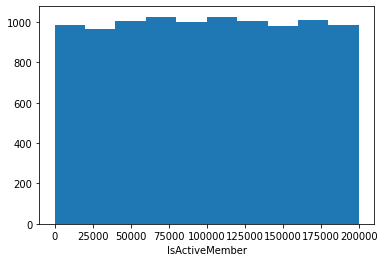

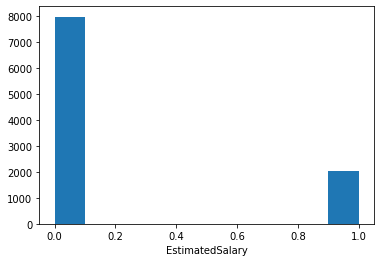

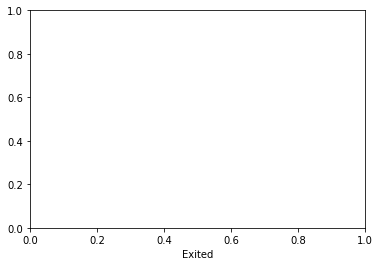

In [119]:
# Histogram
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.show(plt.hist(data[data.columns[i]]))
        plt.xlabel(data.columns[i])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


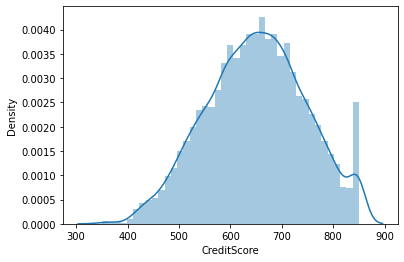

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


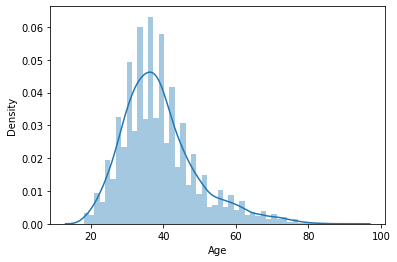

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


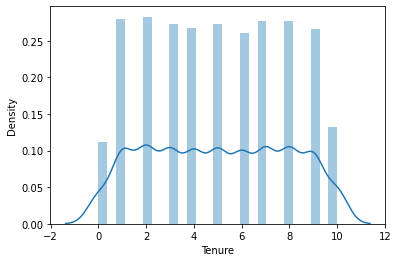

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


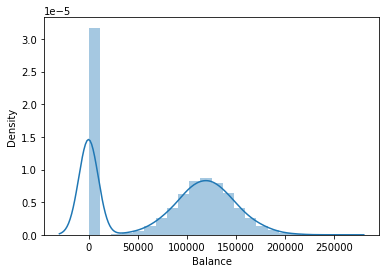

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


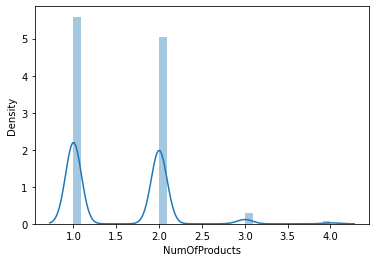

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


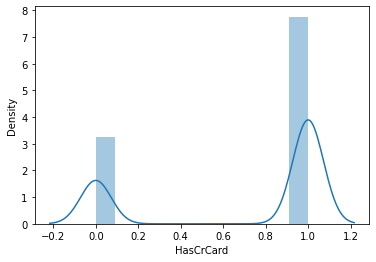

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


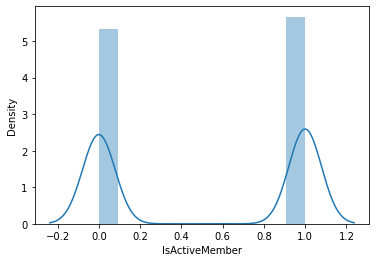

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


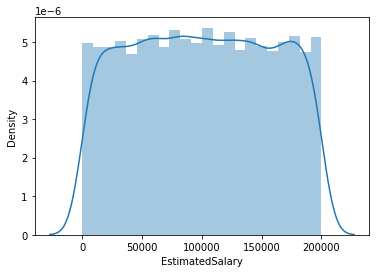

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


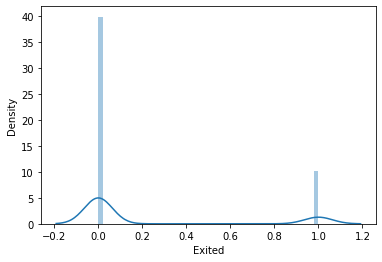

In [120]:
# Distplot
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.show(sns.distplot(data[data.columns[i]]))
        #plt.xlabel(train.columns[i])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


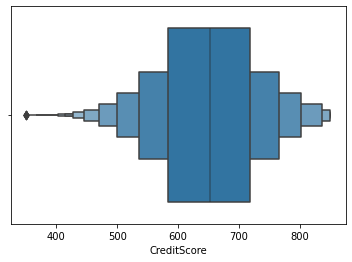

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


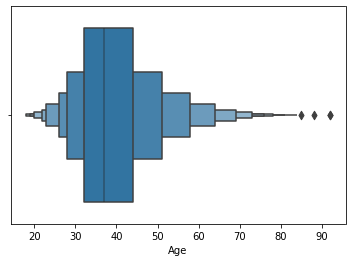

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


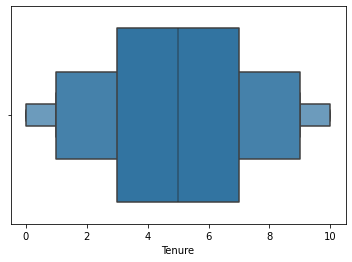

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


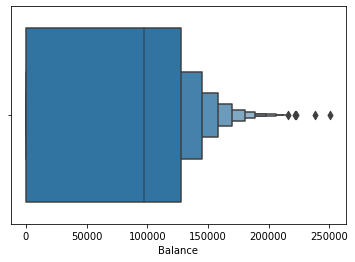

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


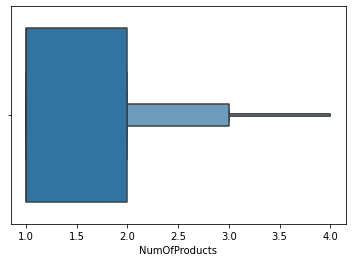

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


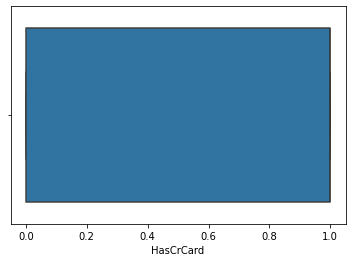

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


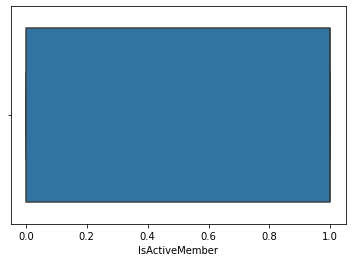

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


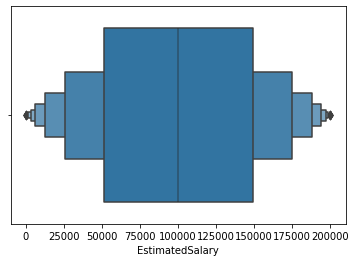

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


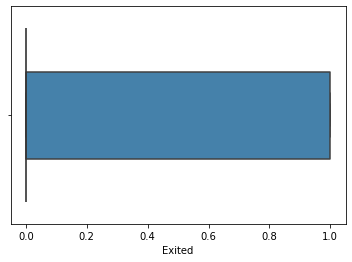

In [121]:
# BoxPlot
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.show(sns.boxenplot(data[data.columns[i]]))
        #plt.xlabel(train.columns[i])

Bivariant Analysis

In [122]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Numeriacl - Numerical

1. ScatterPlot

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


<AxesSubplot:xlabel='CreditScore', ylabel='Age'>

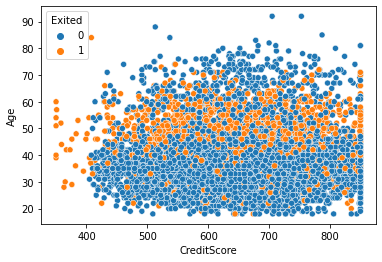

In [123]:
sns.scatterplot(data["CreditScore"], data["Age"], hue=data["Exited"])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


<AxesSubplot:xlabel='CreditScore', ylabel='Balance'>

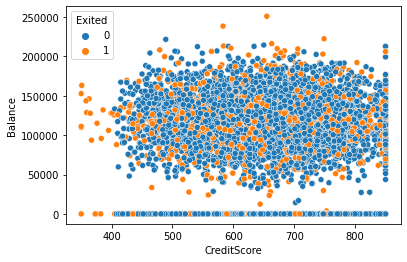

In [124]:
sns.scatterplot(data["CreditScore"], data["Balance"], hue=data["Exited"])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Balance'>

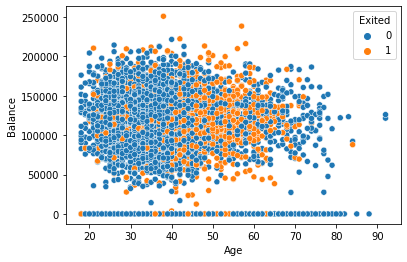

In [125]:
sns.scatterplot(data["Age"], data["Balance"], hue=data["Exited"])

Numericaal - Categorical 

In [126]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


1. Bar PLot

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='Exited'>

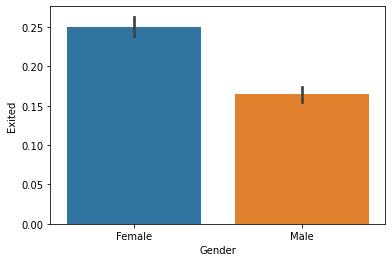

In [127]:
sns.barplot(data["Gender"], data["Exited"])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='CreditScore'>

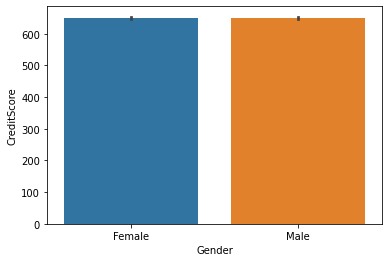

In [128]:
sns.barplot(data["Gender"], data["CreditScore"])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


<AxesSubplot:xlabel='Geography', ylabel='Age'>

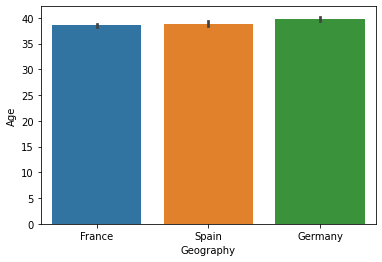

In [129]:
sns.barplot(data["Geography"], data["Age"])

2. Box Plot

In [130]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


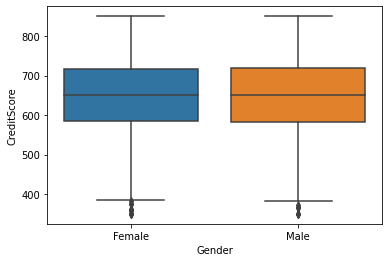

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


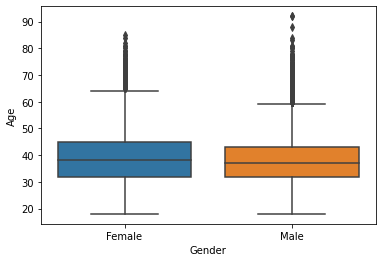

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


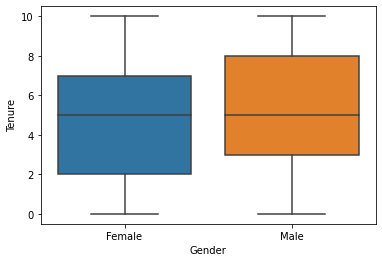

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


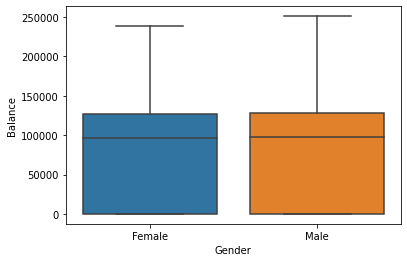

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


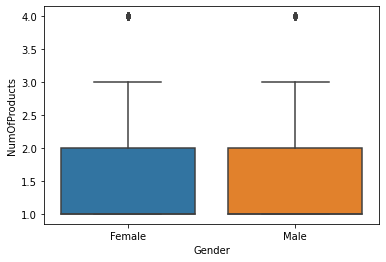

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


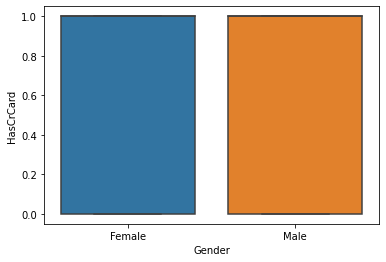

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


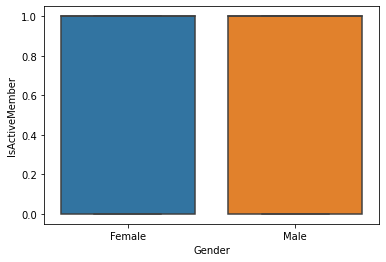

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


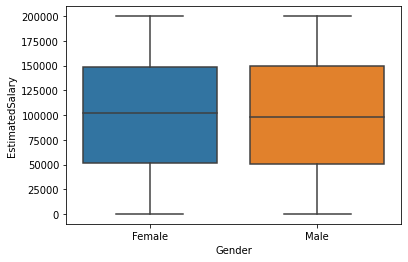

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


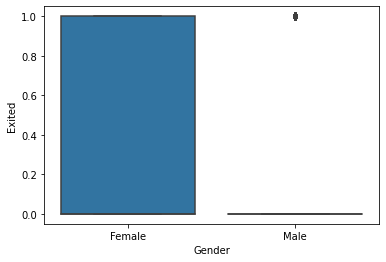

In [131]:
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.show(sns.boxplot(data["Gender"], data[data.columns[i]]))

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


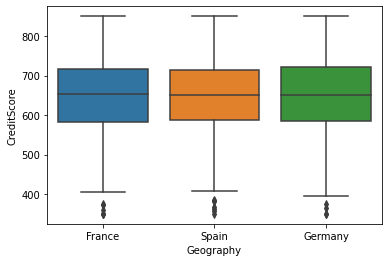

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


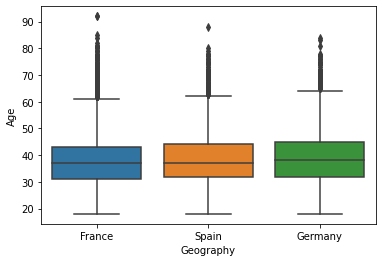

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


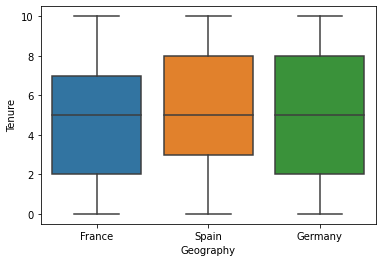

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


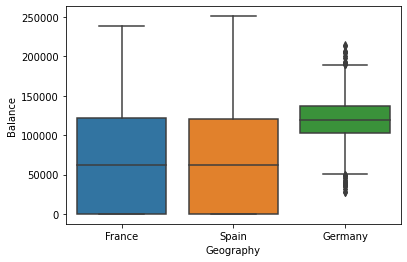

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


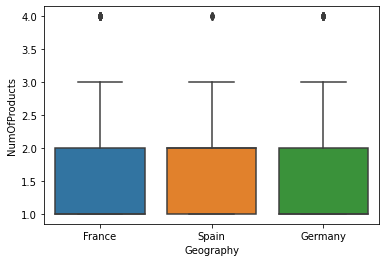

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


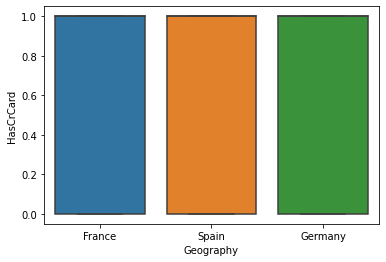

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


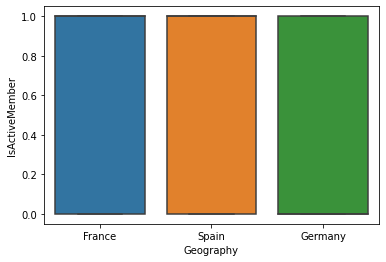

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


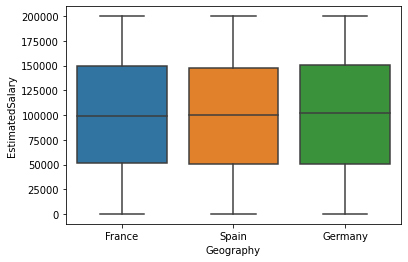

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


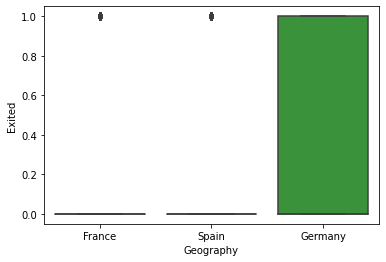

In [132]:
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.show(sns.boxplot(data["Geography"], data[data.columns[i]]))

3. Dist Plot

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

  warnings.warn(msg, FutureWarning)

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Exited', ylabel='Density'>

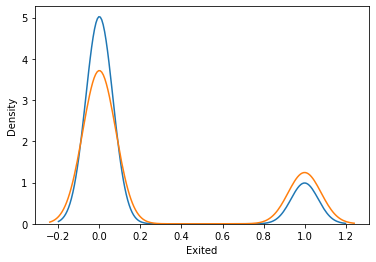

In [133]:
sns.distplot(data[data["Gender"]=="Male"]["Exited"], hist = False)
sns.distplot(data[data["Gender"]=="Female"]["Exited"], hist = False)

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

  warnings.warn(msg, FutureWarning)

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

  warnings.warn(msg, FutureWarning)

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functi

<AxesSubplot:xlabel='Exited', ylabel='Density'>

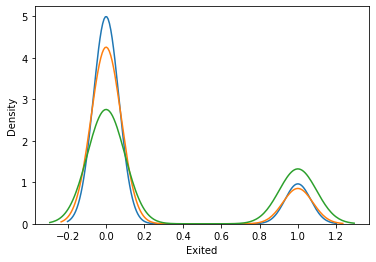

In [134]:
sns.distplot(data[data["Geography"]=="France"]["Exited"], hist = False)
sns.distplot(data[data["Geography"]=="Spain"]["Exited"], hist = False)
sns.distplot(data[data["Geography"]=="Germany"]["Exited"], hist = False)

Categorical - Categorical

In [135]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


1. HeatMap

<AxesSubplot:xlabel='Geography', ylabel='Gender'>

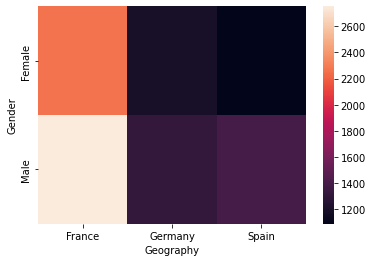

In [136]:
sns.heatmap(pd.crosstab(data["Gender"], data["Geography"]))

2. ClusterMap

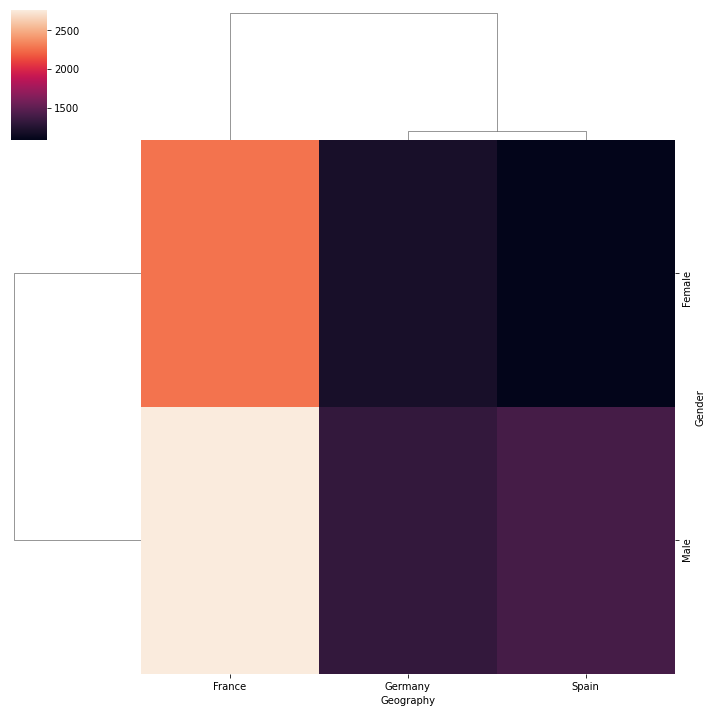

In [137]:
sns.clustermap(pd.crosstab(data["Gender"], data["Geography"]))

Multivariant Analysis

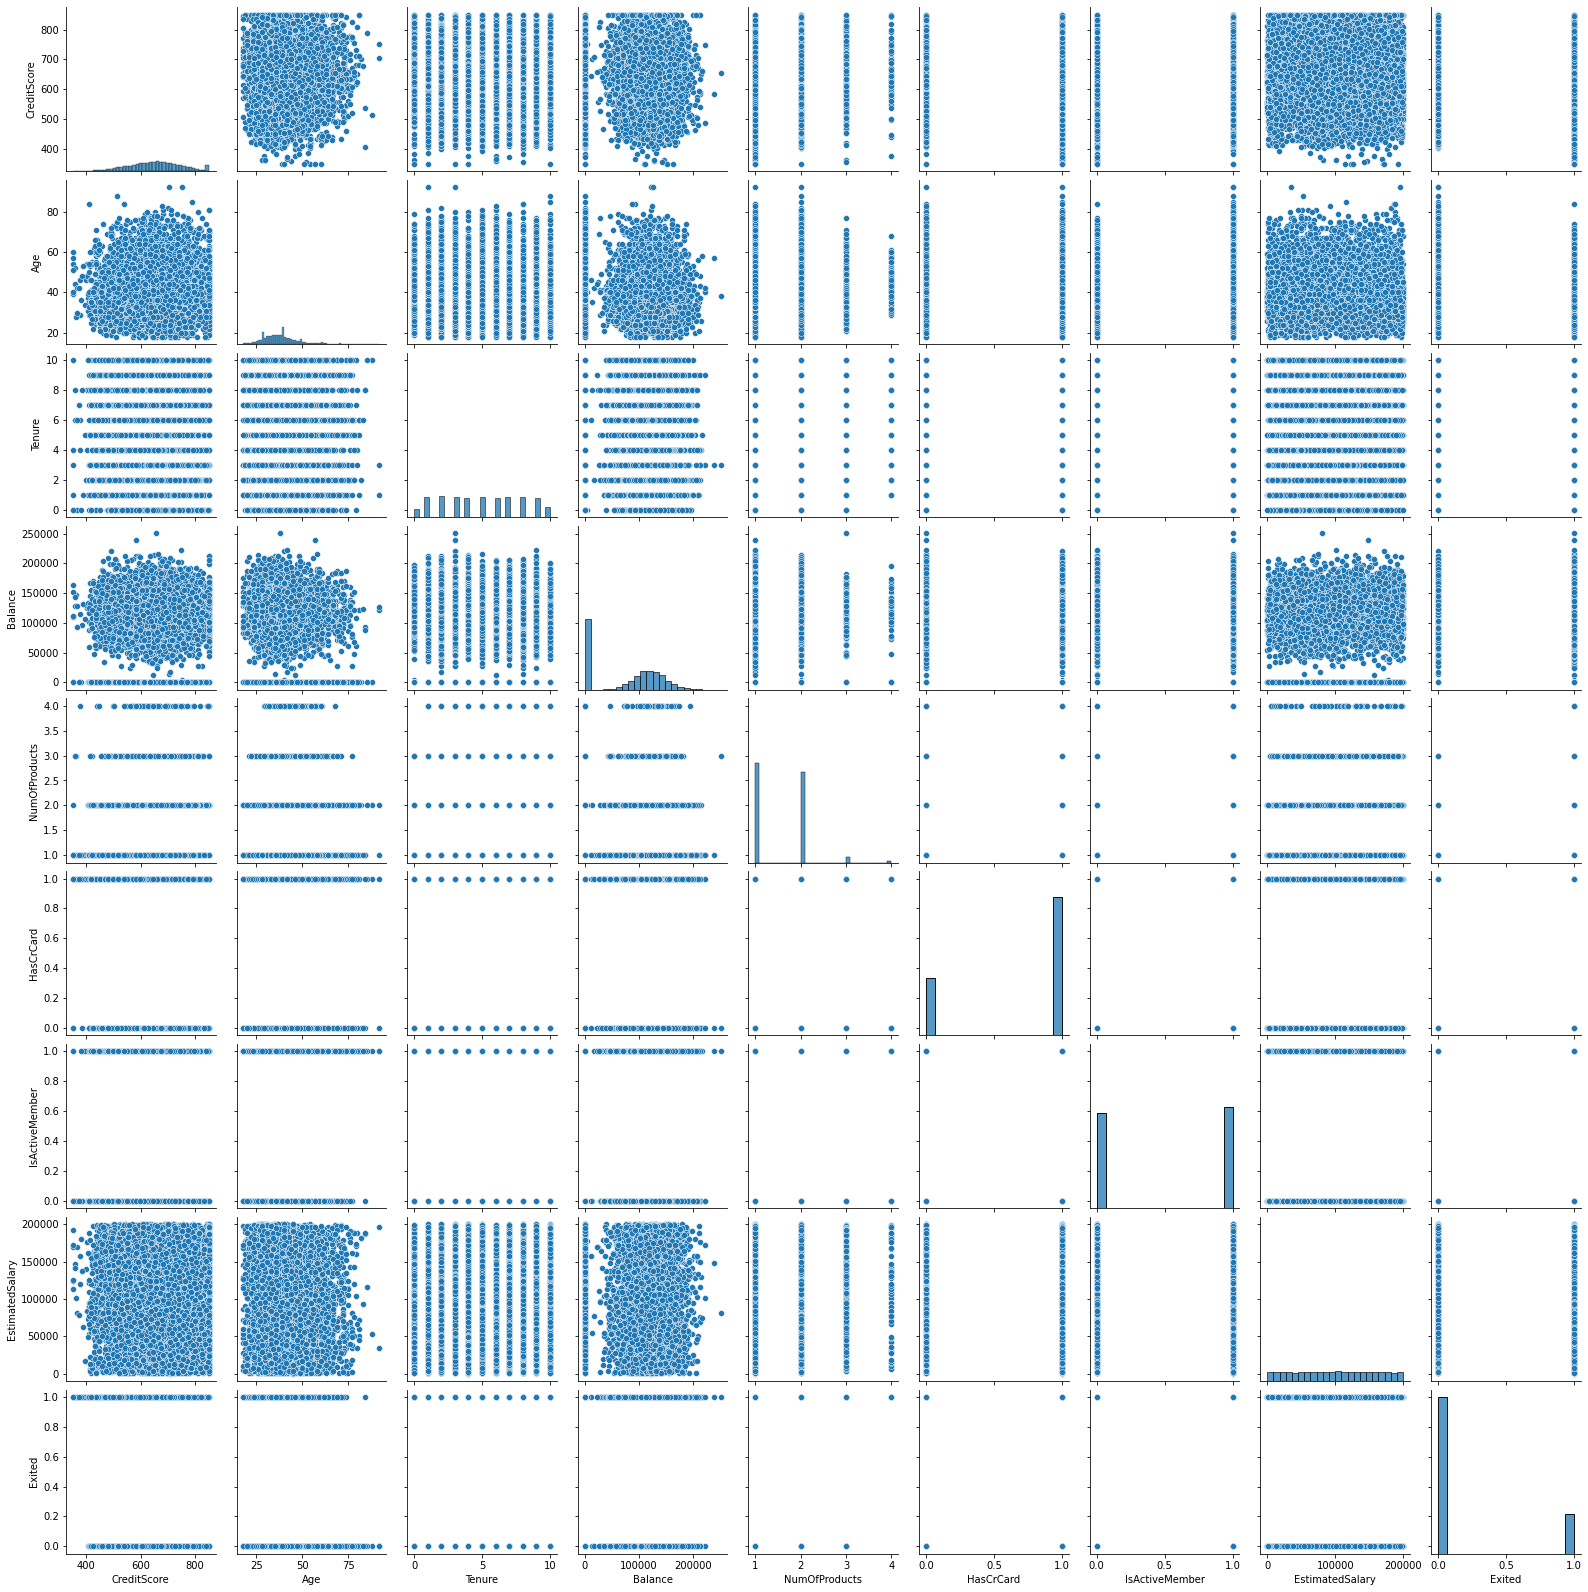

In [138]:
#sns.pairplot(train, hue ="species")
sns.pairplot(data)

In [139]:
data.shape

(10000, 11)

# Feature Transformation

1. Outlier Detection

In [140]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


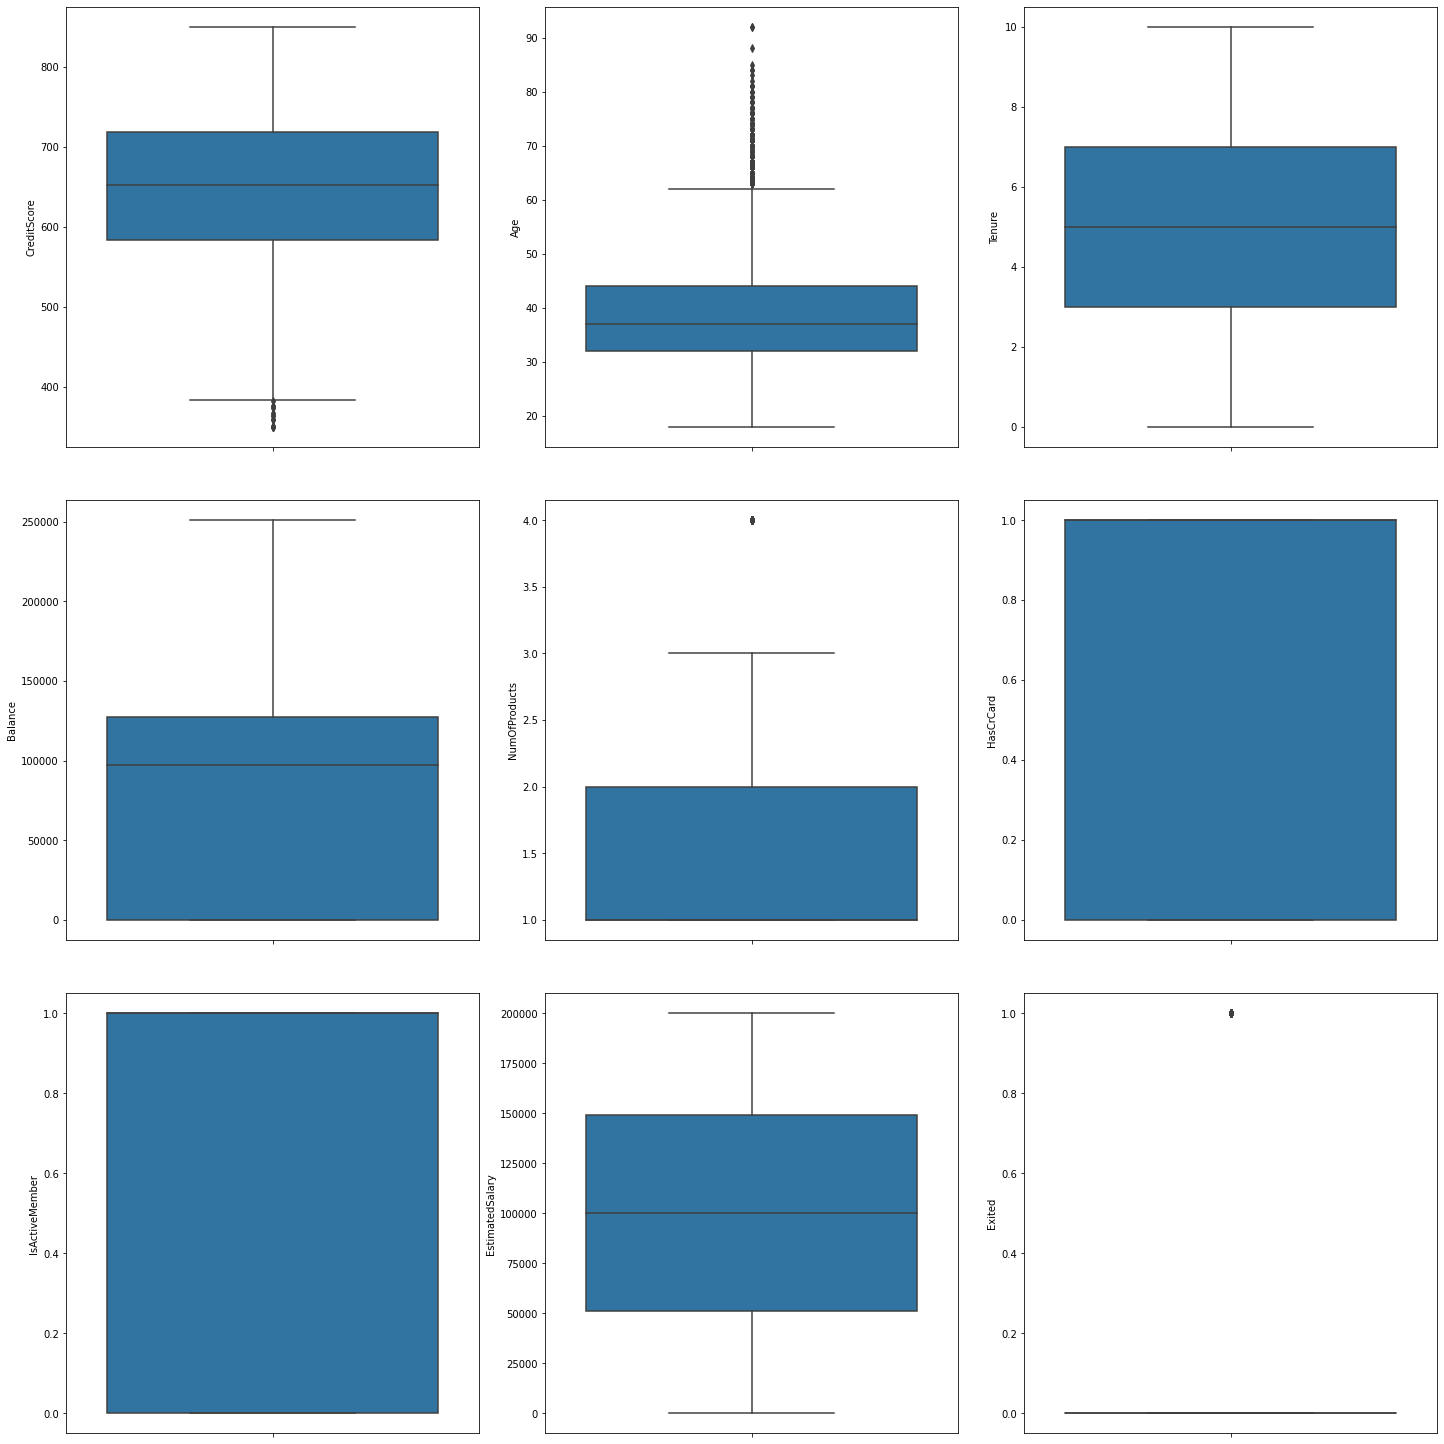

In [142]:
data1 = data.drop(columns=['Geography',"Gender"], axis=1)

fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(20, 20))
index = 0
ax = ax.flatten()

for col in data1.columns:
    sns.boxplot(y=col, data=data1, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

2. Handling Categorical Features 

3. Feature Scaling - Normalization

In [143]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [144]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [145]:
x_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8856,774,France,Female,26,5,0.00,2,1,1,64716.08
1545,602,Germany,Female,42,6,158414.85,1,1,1,131886.46
8136,716,France,Female,38,1,0.00,2,1,1,99661.46
7768,601,Spain,Female,20,9,122446.61,2,1,0,86791.90
7782,585,France,Male,54,8,87105.32,1,1,1,55346.14


In [146]:
transformer = ColumnTransformer(transformers=[
    ("tnf1", OneHotEncoder(drop="first", sparse=False), ["Gender", "Geography"]),
    ("tnf2", MinMaxScaler(), ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary"])
], remainder="passthrough")

In [147]:
x_train = transformer.fit_transform(x_train)
x_test = transformer.transform(x_test)

In [148]:
x_train

array([[0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.32358858],
       [0.        , 1.        , 0.        , ..., 1.        , 1.        ,
        0.65950907],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.49835116],
       ...,
       [1.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.97530661],
       [1.        , 1.        , 0.        , ..., 1.        , 0.        ,
        0.88352332],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.75667846]])

In [149]:
# Sampling the Data
smote = SMOTE(sampling_strategy="minority")
x_train_sm, y_train_sm = smote.fit_resample(x_train,y_train)

In [150]:
counter = Counter
print("BEFORE :",counter(y_train))
print("AFTER :",counter(y_train_sm))

BEFORE : Counter({0: 6346, 1: 1654})

AFTER : Counter({0: 6346, 1: 6346})


In [159]:
x_train_sm.shape

(12692, 11)

# Model Building

**Logistic Regression**

In [161]:
logr = LogisticRegression()
model = logr.fit(x_train_sm,y_train_sm)
pred = model.predict(x_test)
accuracy_score(y_test, pred)*100

71.0

In [164]:
score = []
for i in range(5000):
    x = data.iloc[:,:-1]
    y = data.iloc[:,-1]

    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=i)
    
    x_train = transformer.fit_transform(x_train)
    x_test = transformer.transform(x_test)
    
    smote = SMOTE(sampling_strategy="minority")
    x_train_sm, y_train_sm = smote.fit_resample(x_train,y_train)
    
    logr = LogisticRegression()
    logr.fit(x_train_sm,y_train_sm)
    pred = logr.predict(x_test)
    score.append(accuracy_score(y_test,pred)*100)
print("i= ",np.argmax(score))
print(score[np.argmax(score)])

i=  3803

74.85000000000001


In [165]:
logr = LogisticRegression()

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=3803)
    
x_train = transformer.fit_transform(x_train)
x_test = transformer.transform(x_test)

smote = SMOTE(sampling_strategy="minority")
x_train_sm, y_train_sm = smote.fit_resample(x_train,y_train)

model1 = logr.fit(x_train_sm,y_train_sm)
pred = model1.predict(x_test)
accuracy_score(y_test, pred)*100

74.7

**Decision Tree Classifier**

In [166]:
dtc = DecisionTreeClassifier()
model = dtc.fit(x_train_sm,y_train_sm)
pred = model.predict(x_test)
accuracy_score(y_test, pred)*100

78.0

In [167]:
score = []
for i in range(500):
    x = data.iloc[:,:-1]
    y = data.iloc[:,-1]

    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=i)
    
    x_train = transformer.fit_transform(x_train)
    x_test = transformer.transform(x_test)
    
    smote = SMOTE(sampling_strategy="minority")
    x_train_sm, y_train_sm = smote.fit_resample(x_train,y_train)
    
    dtc = DecisionTreeClassifier()
    dtc.fit(x_train_sm,y_train_sm)
    pred = dtc.predict(x_test)
    score.append(accuracy_score(y_test,pred)*100)
print("i= ",np.argmax(score))
print(score[np.argmax(score)])

i=  406

79.75


In [170]:
dtc = DecisionTreeClassifier()

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=406)
    
x_train = transformer.fit_transform(x_train)
x_test = transformer.transform(x_test)

smote = SMOTE(sampling_strategy="minority")
x_train_sm, y_train_sm = smote.fit_resample(x_train,y_train)

model2 = dtc.fit(x_train_sm,y_train_sm)
pred = model2.predict(x_test)
accuracy_score(y_test, pred)*100

78.9

**Random Forest Classifier**

In [171]:
rf = RandomForestClassifier(n_estimators=150, max_depth=3, min_samples_split=4)
rf.fit(x_train_sm,y_train_sm)
pred = rf.predict(x_test)
accuracy_score(y_test, pred)*100

78.64999999999999

In [172]:
score = []
for i in range(500):
    x = data.iloc[:,:-1]
    y = data.iloc[:,-1]

    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=i)
    
    x_train = transformer.fit_transform(x_train)
    x_test = transformer.transform(x_test)
    
    smote = SMOTE(sampling_strategy="minority")
    x_train_sm, y_train_sm = smote.fit_resample(x_train,y_train)
    
    rfc = RandomForestClassifier(n_estimators=150, max_depth=3, min_samples_split=4, n_jobs=-1)
    rfc.fit(x_train_sm,y_train_sm)
    pred = rfc.predict(x_test)
    score.append(accuracy_score(y_test,pred)*100)
print("i= ",np.argmax(score))
print(score[np.argmax(score)])

i=  392

80.4


In [173]:
rfc = RandomForestClassifier(n_estimators=150, max_depth=3, min_samples_split=4, n_jobs=-1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=392)
    
x_train = transformer.fit_transform(x_train)
x_test = transformer.transform(x_test)

smote = SMOTE(sampling_strategy="minority")
x_train_sm, y_train_sm = smote.fit_resample(x_train,y_train)

model3 = rfc.fit(x_train_sm,y_train_sm)
pred = model3.predict(x_test)
accuracy_score(y_test, pred)*100

80.65